# RealNVP (*In progress*)

**The notebook has been adapted from the notebook provided in David Foster's Generative Deep Learning, 2nd Edition.**
- Book: [Amazon](https://www.amazon.com/Generative-Deep-Learning-Teaching-Machines/dp/1098134184?keywords=generative+deep+learning,+2nd+edition&qid=1684708209&sprefix=generative+de,aps,93&sr=8-1)
- Original notebook (tensorflow and keras): [Github](https://github.com/davidADSP/Generative_Deep_Learning_2nd_Edition/blob/main/notebooks/06_normflow/01_realnvp/realnvp.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as sk_datasets

import torch
from torch import nn
import torchinfo

## 0. Training Parameters

In [2]:
NUM_SAMPLES = 30_000
COULPING_LAYERS = 2
INPUT_DIM = 2
HIDDEN_DIM = 256
REGULARIZATION = 0.01
BATCH_SIZE = 256
EPOCHS = 300

## 1. Preparing Moon dataset

The shape of moon dataset (30000, 2)


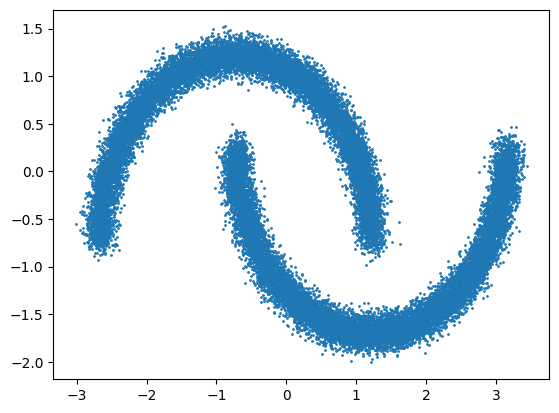

In [3]:
data = sk_datasets.make_moons(NUM_SAMPLES, noise=5e-2)[0].astype("float32")
print("The shape of moon dataset", data.shape)
# data normalization
mean = data.mean()
std = data.std()
data = (data - mean) / (std ** 2)
# visualize data
plt.scatter(data[:, 0], data[:, 1], s=1.0)
plt.show()

## 2. Building RealNVP

Building backbone layer

In [10]:
def get_backbone_layer(n_layers=5, output_activation=nn.Tanh):
    dims = [INPUT_DIM] + [HIDDEN_DIM] * (n_layers - 1) + [INPUT_DIM]
    layers = []
    for i in range(n_layers):
        layers.append(nn.Linear(dims[i], dims[i+1]))
        if i != n_layers - 1: 
            layers.append(nn.ReLU())
        else:
            layers.append(output_activation())
    return nn.Sequential(*layers)

In [13]:
torchinfo.summary(get_backbone_layer(), input=(1, 2))

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            768
├─ReLU: 1-2                              --
├─Linear: 1-3                            65,792
├─ReLU: 1-4                              --
├─Linear: 1-5                            65,792
├─ReLU: 1-6                              --
├─Linear: 1-7                            65,792
├─ReLU: 1-8                              --
├─Linear: 1-9                            514
├─Tanh: 1-10                             --
Total params: 198,658
Trainable params: 198,658
Non-trainable params: 0

In [14]:
torchinfo.summary(get_backbone_layer(output_activation=nn.Identity), input=(1, 2))

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            768
├─ReLU: 1-2                              --
├─Linear: 1-3                            65,792
├─ReLU: 1-4                              --
├─Linear: 1-5                            65,792
├─ReLU: 1-6                              --
├─Linear: 1-7                            65,792
├─ReLU: 1-8                              --
├─Linear: 1-9                            514
├─Identity: 1-10                         --
Total params: 198,658
Trainable params: 198,658
Non-trainable params: 0